<a href="https://colab.research.google.com/github/SrijitaThakur/downloadpdf/blob/main/downloadpdf_and_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse
import re
import matplotlib.pyplot as plt

In [ ]:
# Create a directory for saving text files
text_dir = '/content/sample_data/text'
os.makedirs(text_dir, exist_ok=True)

In [ ]:
# Read the CSV file
df = pd.read_csv('/content/sample_data/article_for_pets.csv')

In [ ]:
# Define a function to extract the last word from the URL
def extract_leaf_node(url):

  """Extracts the leaf node of a URL.

  A leaf node is the last segment of a URL, after the final slash.

  Args:
    url: The URL to extract the leaf node from.

  Returns:
    The leaf node of the URL.
  """

  # Get the last segment of the URL.

  leaf_node = url.split('/')[-1]

  # Return the leaf node.

  return leaf_node

In [ ]:
# Define a function to download and save articles as plain text
def download_and_save_text(url, text_dir):
    response = requests.get(url)
    if response.status_code == 200:
        content = response.text

        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(content, 'html.parser')

        # Extract text from specific tags like <p> and <h1> and join with newlines
        selected_tags = ['p', 'h1']
        text_content = '\n'.join(tag.get_text() for tag in soup.find_all(selected_tags))
        # Remove special characters and retain alphanumeric and common punctuation
        text_content = re.sub(r'[^a-zA-Z0-9\s.,!?;:()"\']', '', text_content)

        # Extract the last word from the URL to use as the filename
        filename = extract_leaf_node(url)
        text_filename = os.path.join(text_dir, f'{filename}.txt')

        # Save the plain text content to a file
        with open(text_filename, 'w', encoding='utf-8') as text_file:
            text_file.write(text_content)

        return text_filename
    return None

In [ ]:

# Loop through the DataFrame
for index, row in df.iterrows():
    url = row['Article URL']
    print(url)

    text_filename = download_and_save_text(url, text_dir)
    if text_filename:
        # Update the DataFrame with the local file name
        df.at[index, 'local_file'] = text_filename
        # Create a new column "article_text" and store the article text in the DataFrame
        with open(text_filename, 'r', encoding='utf-8') as text_file:
            article_text = text_file.read()
            df.at[index, 'article_text'] = article_text


In [ ]:
# Save the updated DataFrame to a CSV file
df.to_csv('/content/sample_data/article_for_pets_updated.csv', index=False)

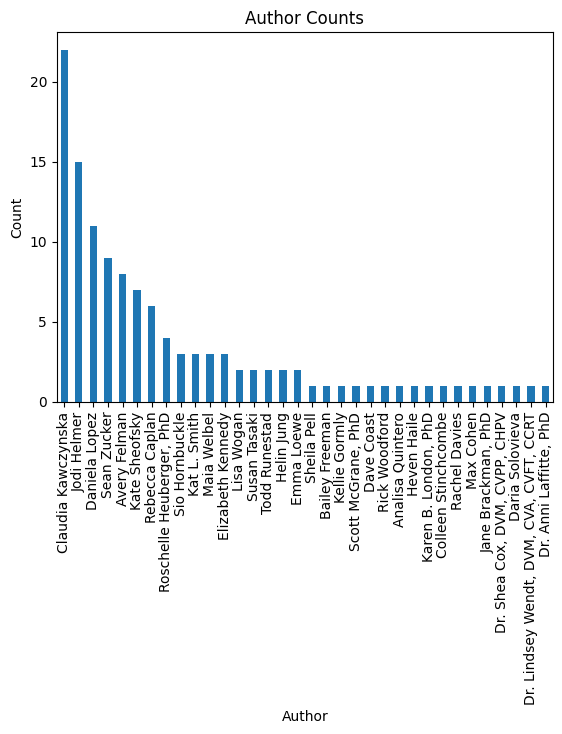

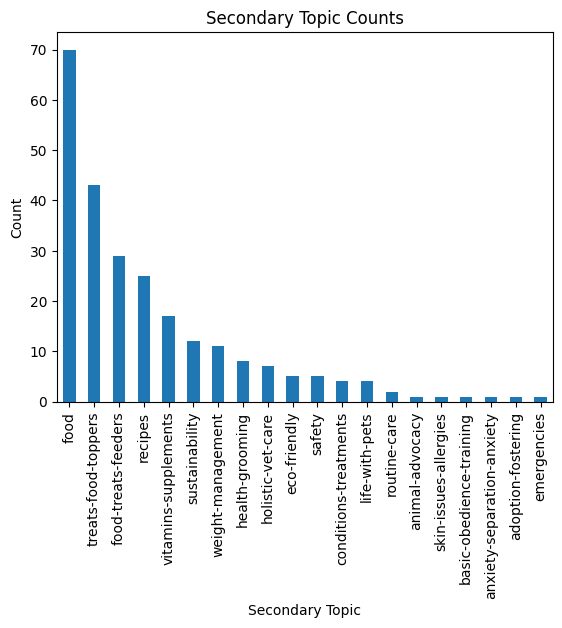

In [ ]:
# Load the updated CSV data
df = pd.read_csv('/content/sample_data/article_for_pets_updated.csv')

# Task 1: Author Counts
author_counts = df['Author'].value_counts()
author_counts.plot(kind='bar', title='Author Counts')
plt.xlabel('Author')
plt.ylabel('Count')
plt.show()

# Task 2: Secondary Topic Counts (Challenging)
# First, split and count the secondary topics
secondary_topic_counts = df['Secondary Topics'].str.split(',').explode().str.strip().value_counts()

# Create a graph for the secondary topics
secondary_topic_counts.plot(kind='bar', title='Secondary Topic Counts')
plt.xlabel('Secondary Topic')
plt.ylabel('Count')
plt.show()


# **Description:**

This Python script is designed to extract and save the content of web pages as plain text files while removing unwanted elements and special characters.

---

The script performs the following steps:

**Setup:**

Create a directory for saving text files, specified as text_dir, and ensure that it exists.
Read a CSV file containing a list of URLs (e.g., 'article_for_pets.csv') and store the data in a Pandas DataFrame.

**Data Processing:**

Define a function to extract the last word from a URL, which will be used as the filename.
Define a function to download and save web pages as plain text.
Download the web page content using the requests library and parse it with BeautifulSoup.

**Content Extraction:**

Extract text content from specific HTML tags such as paragraphs and h1 and join them using newline characters.

Remove special characters and retain alphanumeric characters, common punctuation, spaces, and newline characters using regular expressions.

**File Saving:**

Save the plain text content to a text file with a filename derived from the last word in the URL.

Create a new column in the DataFrame called "article_text" and store the article text in this column.

**Processing Loop:**

Loop through the DataFrame, processing each URL one by one.
Print the URL being processed.
DataFrame Update:

Update the DataFrame with the local file name of the saved text file for each URL.

**Graph Plotting**

Used matplotlib for plotting graph on Author count
and also secondary topics

**Data Export:**

Save the updated DataFrame to a CSV file for future reference.
The resulting plain text files are saved in the specified text_dir directory. This script enables you to convert web page content into clean and structured plain text format for further analysis or archiving, while excluding navigation elements, images, ads, and special characters.


In [ ]:
!pip install -r sample_data/requirements.txt